In [14]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
sp.init_printing(use_latex=True)
from IPython.display import display
from sklearn.decomposition import PCA

In [2]:
def mean_center(x):
     return x - np.mean(x)

## WDBC Data
---

In [3]:
wdbc = np.array(
 pandas.read_table(
 "https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt",
 delim_whitespace=True,
 header=None))
wdbc.shape

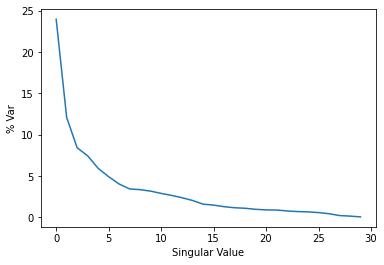

In [13]:
X = wdbc[:,0:30]
Y = wdbc[:,30]

Xcentered = np.apply_along_axis(mean_center,0,X)

U,S,V = np.linalg.svd(Xcentered,full_matrices=True)
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [7]:
100.0*(S[0]+S[1])/np.sum(S)

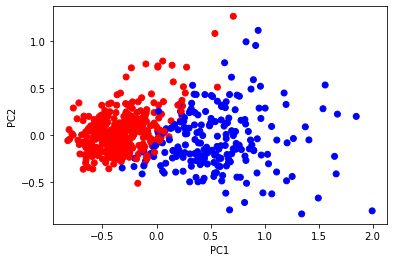

In [8]:
pca = PCA(2)
PCs = pca.fit_transform(X)[:,0:2]

plt.scatter(PCs[:,0],PCs[:,1],
 color=[['red','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

From the calculation above we can see that the first two principle components hold 36 percent of the variance. That's quite high and clearly reflected in this projection. There is a very visible line between the bulk of the two sets. Though the overlapping areas also seem to be the most dense. 

### Cancer Data
---

In [9]:
cancer = np.array(
 pandas.read_table(
 "https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/cancer-data.txt",
 delim_whitespace=True,
 header=None))
cancer.shape

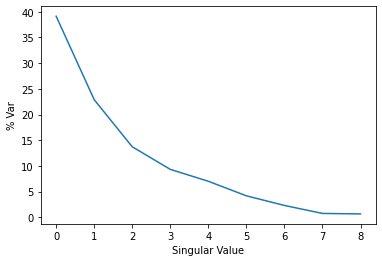

In [10]:
X = cancer[:,0:9]
Y = cancer[:,9]

Xcentered = np.apply_along_axis(mean_center,0,X)

U,S,V = np.linalg.svd(Xcentered,full_matrices=True)
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [11]:
100.0*(S[0]+S[1])/np.sum(S)

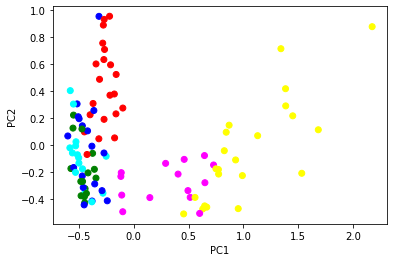

In [12]:
pca = PCA(2)
PCs = pca.fit_transform(X)[:,0:2]

plt.scatter(PCs[:,0],PCs[:,1],
 color=[['red','green','blue','cyan','magenta', 'yellow'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Just from the curve plot above we can tell that there is a great deal of variance in just two of the variables. This is also evident here, the pink and yellow encoded variables have 62% of the variance. Although the others are somewhat distinguishable they all follow the axes pretty similarly. 